In [1]:
import os

from datasets import load_dataset
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm

/home/hicham/miniconda3/envs/phd/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def bbox_intersect(bbox1, bbox2):
    x1, y1, x2, y2 = bbox1
    x3, y3, x4, y4 = bbox2
    return x2 > x3 and x4 > x1 and y2 > y3 and y4 > y1

In [4]:
def divide_bboxes(bbox1, bbox2):
    x1, y1, x2, y2 = bbox1
    x3, y3, x4, y4 = bbox2

    divided_boxes = []
    if x3 > x1:
        divided_boxes.append([x1, y1, x3, y2])  # Left part
    if x4 < x2:
        divided_boxes.append([x4, y1, x2, y2])  # Right part
    if y3 > y1:
        divided_boxes.append([x1, y1, x2, y3])  # Top part
    if y4 < y2:
        divided_boxes.append([x1, y4, x2, y2])  #Bottom part
    return divided_boxes

In [5]:
def area(bbox):
    x1, y1, x2, y2 = bbox
    return (x2 - x1) * (y2 - y1)

In [6]:
# global background_bbox
# background_bbox = [0, 0, 0, 0]
def get_background_bboxes(background_bbox, handled_bbox, bboxes):
    if len(bboxes) != 0:
        bbox = bboxes[0]
        divided_bboxes = divide_bboxes(handled_bbox, bbox)
        for divided_bbox in divided_bboxes:
            if area(divided_bbox) > area(background_bbox):
                get_background_bboxes(background_bbox, divided_bbox, [bb for bb in bboxes if bbox_intersect(divided_bbox, bb)])
    else:
        if area(handled_bbox) > area(background_bbox):
            background_bbox[:] = handled_bbox

In [9]:
dataset = load_dataset("detection-datasets/coco")

In [9]:
sample = dataset['train'][36912]
image = sample['image']
image_id = sample['image_id']
bboxes = sample['objects']['bbox']
bbox_ids = sample["objects"]["bbox_id"]
labels = sample["objects"]["category"]
sample['image_id']

183338

In [7]:
bboxes

[[84.09, 93.46, 92.55000000000001, 102.02],
 [53.48, 125.11, 153.76, 377.25],
 [285.7, 205.4, 307.95, 257.81],
 [429.9, 206.13, 443.78999999999996, 238.8],
 [246.55, 211.3, 256.3, 237.92000000000002],
 [489.85, 211.54, 529.5, 288.45],
 [78.25, 80.85, 106.11, 140.5],
 [483.16, 227.05, 499.47, 241.01000000000002],
 [285.75, 234.75, 288.02, 248.49],
 [460.03, 216.58, 470.16999999999996, 229.9],
 [432.74, 213.47, 437.66, 222.18],
 [285.62, 244.99, 287.18, 248.64000000000001],
 [287.89, 241.35, 288.12, 244.98999999999998]]

In [86]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 117266
    })
    val: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 4952
    })
})

In [79]:
bboxes

[[84.09, 93.46, 92.55000000000001, 102.02],
 [53.48, 125.11, 153.76, 377.25],
 [285.7, 205.4, 307.95, 257.81],
 [429.9, 206.13, 443.78999999999996, 238.8],
 [246.55, 211.3, 256.3, 237.92000000000002],
 [489.85, 211.54, 529.5, 288.45],
 [78.25, 80.85, 106.11, 140.5],
 [483.16, 227.05, 499.47, 241.01000000000002],
 [285.75, 234.75, 288.02, 248.49],
 [460.03, 216.58, 470.16999999999996, 229.9],
 [432.74, 213.47, 437.66, 222.18],
 [285.62, 244.99, 287.18, 248.64000000000001],
 [287.89, 241.35, 288.12, 244.98999999999998]]

In [80]:
global background_bbox
background_bbox = [0, 0, 0, 0]
get_background_bboxes(background_bbox, [0, 0, image.size[0], image.size[1]], bboxes)
background_bbox

[153.76, 0, 640, 205.4]

NameError: name 'background_bbox' is not defined

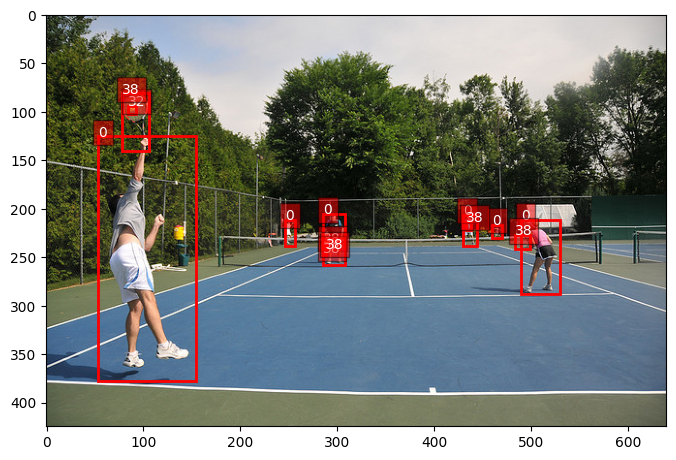

In [10]:
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(image)

# Add bounding boxes
for bbox, label in zip(bboxes, labels):
    x1, y1, x2, y2 = bbox
    # x1, y1, w, h = bbox
    w, h = x2 - x1, y2 - y1
    rect = patches.Rectangle((x1, y1), w, h, linewidth=2,
                             edgecolor="red", facecolor="none")
    ax.add_patch(rect)
    ax.text(x1, y1, label, color="white", fontsize=10,
            bbox=dict(facecolor="red", alpha=0.5))

x1, y1, x2, y2 = background_bbox
w, h = x2 - x1, y2 - y1
rect = patches.Rectangle((x1, y1), w, h, linewidth=2,
                         edgecolor="green", facecolor="none")
# ax.add_patch(rect)

# plt.axis("off")
plt.show()

In [82]:
image.crop((x1, y1, x2, y2)).size

(486, 205)

In [83]:
# for bbox, bbox_id, label in zip(bboxes, bbox_ids, labels):
#     x1, y1, x2, y2 = bbox
#     w, h = x2 - x1, y2 - y1
#     image.crop((x1, y1, x2, y2)).save(f"{image_id}_{bbox_id}.png")

In [84]:
# labels = ['background'] + dataset["train"].features["objects"]['category'].feature.names
# label2id, id2label = {}, {}
# for i, label in enumerate(labels):
#     label2id[label] = str(i)
#     id2label[str(i)] = label

In [85]:
# for sample in tqdm(dataset['train']):
#     image = sample['image']
#     image_id = sample['image_id']
#     bboxes = sample['objects']['bbox']
#     bbox_ids = sample["objects"]["bbox_id"]
#     labels = sample["objects"]["category"]
#
#     if image_id == 200365:
#         bboxes.pop(2)
#         labels.pop(2)
#         bbox_ids.pop(2)
#     if image_id == 550395:
#         bboxes.pop()
#         labels.pop()
#         bbox_ids.pop()
#
#     global background_bbox
#     background_bbox = [0, 0, 0, 0]
#     get_background_bboxes(background_bbox, [0, 0, image.size[0], image.size[1]], bboxes)
#     w_min, h_min = image.size
#
#     for bbox, bbox_id, label in zip(bboxes, bbox_ids, labels):
#         x1, y1, x2, y2 = bbox
#         w, h = x2 - x1, y2 - y1
#         w_min = min(w_min, w)
#         h_min = min(h_min, h)
#         os.makedirs(f"dataset/train/{id2label[str(label+1)]}", exist_ok=True)
#         image.crop((x1, y1, x2, y2)).save(f"dataset/train/{id2label[str(label+1)]}/{image_id}_{bbox_id}.png")
#
#     x1, y1, x2, y2 = background_bbox
#     os.makedirs(f"dataset/train/{id2label['0']}", exist_ok=True)
#     w, h = x2 - x1, y2 - y1
#     if w > w_min/2 and h > h_min/2 and area(background_bbox) > 25:
#         image.crop((x1, y1, x2, y2)).save(f"dataset/train/{id2label['0']}/{image_id}_background.png")

In [89]:
dataset = load_dataset("imagefolder", data_dir="dataset", drop_labels=False)

Resolving data files:   0%|          | 0/974418 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/41076 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset = load_dataset(type="ImageFolder", path="dataset")


In [ ]:
dataset.push_to_hub("HichTala/coco-background")

Uploading the dataset shards:   0%|          | 0/174 [00:00<?, ? shards/s]

Map:   0%|          | 0/5601 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

Map:   0%|          | 0/5601 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

Map:   0%|          | 0/5601 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

In [27]:
for sample in tqdm(dataset['train']):
    image = sample['image']
    image_id = sample['image_id']
    bboxes = sample['objects']['bbox']
    bbox_ids = sample["objects"]["bbox_id"]
    labels = sample["objects"]["category"]

    if image_id == 200365:
        bboxes.pop(2)
        labels.pop(2)
        bbox_ids.pop(2)
    if image_id == 550395:
        bboxes.pop()
        labels.pop()
        bbox_ids.pop()

    global background_bbox
    background_bbox = [0, 0, 0, 0]
    get_background_bboxes(background_bbox, [0, 0, image.size[0], image.size[1]], bboxes)
    w_min, h_min = image.size

    for bbox, bbox_id, label in zip(bboxes, bbox_ids, labels):
        x1, y1, x2, y2 = bbox
        w, h = x2 - x1, y2 - y1
        w_min = min(w_min, w)
        h_min = min(h_min, h)
        os.makedirs(f"dataset/train/{id2label[str(label+1)]}", exist_ok=True)
        image.crop((x1, y1, x2, y2)).save(f"dataset/train/{id2label[str(label+1)]}/{image_id}_{bbox_id}.png")

    x1, y1, x2, y2 = background_bbox
    os.makedirs(f"dataset/train/{id2label['0']}", exist_ok=True)
    w, h = x2 - x1, y2 - y1
    if w > w_min and h > h_min and area(background_bbox) > 25:
        image.crop((x1, y1, x2, y2)).save(f"dataset/train/{id2label['0']}/{image_id}_background.png")

  0%|          | 1/117266 [00:00<3:55:54,  8.28it/s]

dataset/train/bowl
dataset/train/bowl
dataset/train/broccoli
dataset/train/bowl
dataset/train/orange
dataset/train/orange
dataset/train/orange
dataset/train/orange
dataset/train/giraffe
dataset/train/giraffe
dataset/train/potted plant
dataset/train/vase
dataset/train/zebra


  0%|          | 7/117266 [00:00<1:27:43, 22.28it/s]

dataset/train/umbrella
dataset/train/person
dataset/train/dog
dataset/train/horse
dataset/train/horse
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/potted plant
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/elephant
dataset/train/elephant
dataset/train/person
dataset/train/car
dataset/train/truck
dataset/train/stop sign
dataset/train/clock
dataset/train/car
dataset/train/car
dataset/train/car
dataset/train/car
dataset/train/train
dataset/train/car
dataset/train/car
dataset/train/truck
dataset/train/truck
dataset/train/car
dataset/train/car
dataset/train/car
dataset/train/car
dataset/train/car
dataset/train/car
dataset/train/car


  0%|          | 14/117266 [00:00<1:15:54, 25.75it/s]

dataset/train/giraffe
dataset/train/giraffe
dataset/train/motorcycle
dataset/train/motorcycle
dataset/train/dog
dataset/train/bicycle
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/skateboard
dataset/train/skateboard
dataset/train/person
dataset/train/person
dataset/train/skateboard
dataset/train/person
dataset/train/clock


  0%|          | 20/117266 [00:00<1:17:32, 25.20it/s]

dataset/train/airplane
dataset/train/person
dataset/train/motorcycle
dataset/train/handbag
dataset/train/knife
dataset/train/knife
dataset/train/knife
dataset/train/knife
dataset/train/knife
dataset/train/oven
dataset/train/microwave
dataset/train/book
dataset/train/book
dataset/train/book
dataset/train/fork
dataset/train/cake
dataset/train/car
dataset/train/truck
dataset/train/dog
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/bench
dataset/train/bench
dataset/train/person
dataset/train/person


  0%|          | 23/117266 [00:01<1:29:15, 21.89it/s]

dataset/train/chair
dataset/train/chair
dataset/train/fork
dataset/train/knife
dataset/train/pizza
dataset/train/dining table
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/cup
dataset/train/chair
dataset/train/chair
dataset/train/dining table
dataset/train/person
dataset/train/person
dataset/train/dining table
dataset/train/cup
dataset/train/cup
dataset/train/cup
dataset/train/chair
dataset/train/chair
dataset/train/person
dataset/train/cup
dataset/train/cup
dataset/train/knife
dataset/train/cake
dataset/train/person
dataset/train/dining table
dataset/train/person
dataset/train/cup
dataset/train/cup
dataset/train/cup
dataset/train/cup
dataset/train/cup
dataset/train/cup
dataset/train/cup
dataset/train/cup
dataset/train/potted plant
dataset/train/dining table
dataset/train/cup
dataset/train/knife
dataset/train/spoon
dataset/train/cake
dataset/train/book

  0%|          | 26/117266 [00:01<1:39:21, 19.67it/s]

dataset/train/person
dataset/train/bench
dataset/train/bench
dataset/train/dining table
dataset/train/umbrella
dataset/train/bed
dataset/train/teddy bear
dataset/train/person
dataset/train/person
dataset/train/giraffe
dataset/train/giraffe
dataset/train/refrigerator
dataset/train/clock
dataset/train/bowl
dataset/train/oven
dataset/train/sink
dataset/train/potted plant
dataset/train/vase
dataset/train/bottle
dataset/train/dining table
dataset/train/banana
dataset/train/sandwich


  0%|          | 32/117266 [00:01<1:32:05, 21.22it/s]

dataset/train/bird
dataset/train/bird
dataset/train/bird
dataset/train/bird
dataset/train/bird
dataset/train/bird
dataset/train/bird
dataset/train/bird
dataset/train/giraffe
dataset/train/giraffe
dataset/train/giraffe
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/kite
dataset/train/kite
dataset/train/kite
dataset/train/kite
dataset/train/person
dataset/train/person
dataset/train/car
dataset/train/car
dataset/train/car
dataset/train/car
dataset/train/kite
dataset/train/kite
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/train
dataset/train/stop sign
dataset/train/zebra
dataset/train/zebra
dataset/train/zebra
dataset/train/bottle
dataset/train/bottle
dataset/train/bottle
dataset/train/bottle
dataset/train/bottle
dataset/train/refrigerator
dataset/train/bottle
dataset/train/bottle
dataset/train/bottle
dat

  0%|          | 36/117266 [00:01<1:32:04, 21.22it/s]

dataset/train/tie
dataset/train/person
dataset/train/person
dataset/train/scissors
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/person
dataset/train/baseball bat
dataset/train/knife
dataset/train/pizza


KeyboardInterrupt: 

In [152]:
dataset = load_dataset("HichTala/coco-background")

In [153]:
exclude_idx = [17725, 85356, 140667, 243422, 569617, 838562, 838563]

In [57]:
len(dataset['train'])

974418

In [154]:
dataset['train'] = dataset['train'].select(
    (
        i for i in range(len(dataset['train']))
        if i not in set(exclude_idx)
    )
)

In [155]:
for sample in tqdm(dataset['train']):
    image = sample['image']

100%|██████████| 974411/974411 [14:59<00:00, 1083.48it/s]


In [148]:
dataset['train'][838564]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=46x83>,
 'label': 58}

In [156]:
dataset.push_to_hub("HichTala/coco-background")

Map: 100%|██████████| 9461/9461 [00:03<00:00, 2417.91 examples/s]

Creating parquet from Arrow format: 100%|██████████| 5/5 [00:00<00:00,  8.10ba/s]
Processing Files (0 / 0): |          |  0.00B /  0.00B            
Processing Files (0 / 1):  86%|████████▋ |  454MB /  526MB,  207MB/s  
Processing Files (0 / 1):  87%|████████▋ |  456MB /  526MB,  190MB/s  
Processing Files (0 / 1):  87%|████████▋ |  459MB /  526MB,  177MB/s  
Processing Files (0 / 1):  88%|████████▊ |  463MB /  526MB,  166MB/s  
Processing Files (0 / 1):  89%|████████▉ |  468MB /  526MB,  156MB/s  
Processing Files (0 / 1):  90%|████████▉ |  472MB /  526MB,  148MB/s  
Processing Files (0 / 1):  90%|█████████ |  475MB /  526MB,  140MB/s  
Processing Files (0 / 1):  91%|█████████▏|  481MB /  526MB,  133MB/s  
Processing Files (0 / 1):  92%|█████████▏|  486MB /  526MB,  128MB/s  
Processing Files (0 / 1):  93%|█████████▎|  490MB /  526MB,  122MB/s  
Processing Files (0 / 1):  94%|█████████▍|  494MB /  526MB,  118MB/s  
Pro

CommitInfo(commit_url='https://huggingface.co/datasets/HichTala/coco-background/commit/01043aba76886745984f789d4e84e6b0ab621189', commit_message='Upload dataset', commit_description='', oid='01043aba76886745984f789d4e84e6b0ab621189', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/HichTala/coco-background', endpoint='https://huggingface.co', repo_type='dataset', repo_id='HichTala/coco-background'), pr_revision=None, pr_num=None)

In [2]:
from datasets import load_dataset
# Full dataset
dataset = load_dataset("HuggingFaceM4/COCO")
print(dataset)

RuntimeError: Dataset scripts are no longer supported, but found COCO.py

In [ ]:
# Training set only
dataset = load_dataset("rafaelpadilla/coco2017", split="train")

# Validation set only
dataset = load_dataset("rafaelpadilla/coco2017", split="val")

In [8]:
for sample in tqdm(dataset['train']):
    bboxes = sample['objects']['bbox']
    image_id = sample['image_id']

    if image_id == 200365:
        bboxes.pop(2)
        labels.pop(2)
        bbox_ids.pop(2)
    if image_id == 550395:
        bboxes.pop()
        labels.pop()
        bbox_ids.pop()

    for bbox in bboxes:
        x1, y1, x2, y2 = bbox
        w, h = x2 - x1, y2 - y1
        bbox = [x1, y1, w, h]

100%|██████████| 117266/117266 [04:21<00:00, 448.07it/s]


In [9]:
sample = new_dataset['train'][36912]
image = sample['image']
image_id = sample['image_id']
bboxes = sample['objects']['bbox']
bbox_ids = sample["objects"]["bbox_id"]
labels = sample["objects"]["category"]
sample['image_id']

183338

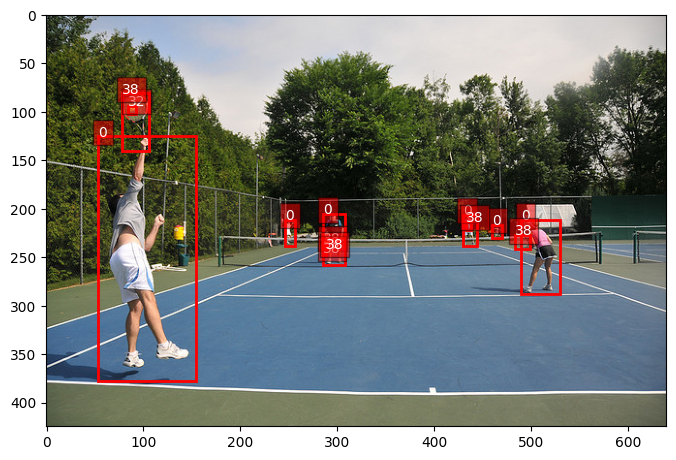

In [11]:
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(image)

# Add bounding boxes
for bbox, label in zip(bboxes, labels):
    # x1, y1, x2, y2 = bbox
    x1, y1, w, h = bbox
    # w, h = x2 - x1, y2 - y1
    rect = patches.Rectangle((x1, y1), w, h, linewidth=2,
                             edgecolor="red", facecolor="none")
    ax.add_patch(rect)
    ax.text(x1, y1, label, color="white", fontsize=10,
            bbox=dict(facecolor="red", alpha=0.5))
# ax.add_patch(rect)

# plt.axis("off")
plt.show()

In [2]:
def change_format(sample):
    image_id = sample['image_id']
    bboxes = sample['objects']['bbox']
    labels = sample["objects"]["category"]
    bbox_ids = sample["objects"]["bbox_id"]

    if image_id == 200365:
        bboxes.pop(2)
        labels.pop(2)
        bbox_ids.pop(2)
    if image_id == 550395:
        bboxes.pop()
        labels.pop()
        bbox_ids.pop()

    new_format = []
    for bbox in bboxes:
        x1, y1, x2, y2 = bbox
        w, h = x2 - x1, y2 - y1
        new_format.append((x1, y1, w, h))
    sample['objects']['bbox'] = new_format
    sample['objects']['category'] = labels
    sample['objects']['bbox_id'] = bbox_ids

    return sample

In [4]:
dataset = load_dataset("detection-datasets/coco")

In [3]:
sample = dataset['train'][36912]
new_sample = change_format(sample)

NameError: name 'dataset' is not defined

In [29]:
new_sample

{'image_id': 183338,
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x425>,
 'width': 640,
 'height': 425,
 'objects': {'bbox_id': [304035,
   463085,
   503336,
   513507,
   535257,
   563183,
   656635,
   658038,
   660540,
   1747773,
   1864400,
   1864525,
   1864550],
  'category': [32, 0, 0, 0, 0, 0, 38, 38, 38, 0, 38, 38, 38],
  'bbox': [(84.09, 93.46, 8.460000000000008, 8.560000000000002),
   (53.48, 125.11, 100.28, 252.14),
   (285.7, 205.4, 22.25, 52.41),
   (429.9, 206.13, 13.889999999999986, 32.670000000000016),
   (246.55, 211.3, 9.75, 26.620000000000005),
   (489.85, 211.54, 39.64999999999998, 76.91),
   (78.25, 80.85, 27.86, 59.650000000000006),
   (483.16, 227.05, 16.310000000000002, 13.960000000000008),
   (285.75, 234.75, 2.269999999999982, 13.740000000000009),
   (460.03, 216.58, 10.139999999999986, 13.319999999999993),
   (432.74, 213.47, 4.920000000000016, 8.710000000000008),
   (285.62, 244.99, 1.5600000000000023, 3.6500000000000057),
   (28

In [8]:
sample

{'image_id': 183338,
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x425>,
 'width': 640,
 'height': 425,
 'objects': {'bbox_id': [304035,
   463085,
   503336,
   513507,
   535257,
   563183,
   656635,
   658038,
   660540,
   1747773,
   1864400,
   1864525,
   1864550],
  'category': [32, 0, 0, 0, 0, 0, 38, 38, 38, 0, 38, 38, 38],
  'bbox': [[84.09, 93.46, 92.55000000000001, 102.02],
   [53.48, 125.11, 153.76, 377.25],
   [285.7, 205.4, 307.95, 257.81],
   [429.9, 206.13, 443.78999999999996, 238.8],
   [246.55, 211.3, 256.3, 237.92000000000002],
   [489.85, 211.54, 529.5, 288.45],
   [78.25, 80.85, 106.11, 140.5],
   [483.16, 227.05, 499.47, 241.01000000000002],
   [285.75, 234.75, 288.02, 248.49],
   [460.03, 216.58, 470.16999999999996, 229.9],
   [432.74, 213.47, 437.66, 222.18],
   [285.62, 244.99, 287.18, 248.64000000000001],
   [287.89, 241.35, 288.12, 244.98999999999998]],
  'area': [58.48604999999998,
   8326.415850000003,
   577.1245000000008,
   228.5

In [5]:
new_dataset = dataset.map(change_format)

Map: 100%|██████████| 4952/4952 [00:01<00:00, 3485.67 examples/s]


In [12]:
new_dataset.push_to_hub("HichTala/coco")

Map: 100%|██████████| 3007/3007 [00:01<00:00, 2792.67 examples/s]

Creating parquet from Arrow format: 100%|██████████| 5/5 [00:00<00:00,  8.66ba/s]
Processing Files (0 / 0): |          |  0.00B /  0.00B            
Processing Files (0 / 1):   0%|          |  525kB /  497MB,  656kB/s  
Processing Files (0 / 1):   1%|          | 3.15MB /  497MB, 2.63MB/s  
Processing Files (0 / 1):   1%|          | 4.73MB /  497MB, 3.38MB/s  
Processing Files (0 / 1):   2%|▏         | 8.93MB /  497MB, 5.58MB/s  
Processing Files (0 / 1):   2%|▏         | 12.1MB /  497MB, 6.71MB/s  
Processing Files (0 / 1):   3%|▎         | 15.2MB /  497MB, 7.62MB/s  
Processing Files (0 / 1):   4%|▍         | 19.4MB /  497MB, 8.84MB/s  
Processing Files (0 / 1):   5%|▍         | 23.1MB /  497MB, 9.63MB/s  
Processing Files (0 / 1):   5%|▌         | 25.7MB /  497MB, 9.90MB/s  
Processing Files (0 / 1):   6%|▌         | 28.9MB /  497MB, 10.3MB/s  
Processing Files (0 / 1):   7%|▋         | 33.6MB /  497MB, 11.2MB/s  
Pro

CommitInfo(commit_url='https://huggingface.co/datasets/HichTala/coco/commit/249aee37d2324ee8cc154c74f46b427b321a480c', commit_message='Upload dataset', commit_description='', oid='249aee37d2324ee8cc154c74f46b427b321a480c', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/HichTala/coco', endpoint='https://huggingface.co', repo_type='dataset', repo_id='HichTala/coco'), pr_revision=None, pr_num=None)